In [1]:
import syft as sy

# Part 1: Join the Duet Server the Data Owner connected to


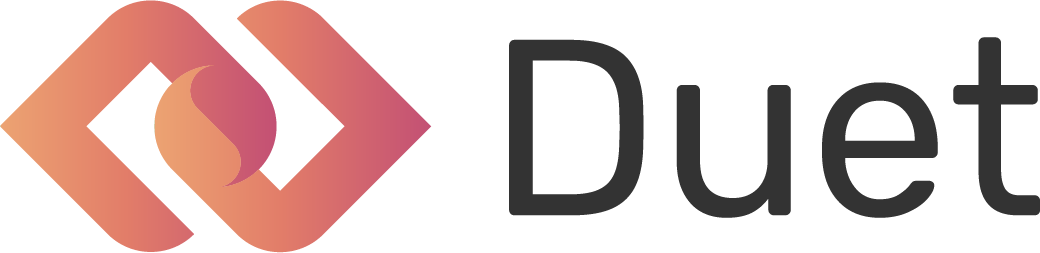

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [2]:
duet = sy.join_duet(loopback=True)

### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 0 : Now STOP and run the Data Owner notebook until Checkpoint 1.

# Part 2: Search for Available Data


In [3]:
# The data scientist can check the list of searchable data in Data Owner's duet store
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 16cd2f0ba2734a6aa4cb498bdf83f635>,[HEIGHTS of GROUP A],This is a list of heights (cm) of GROUP A - 6 ...,<class 'torch.Tensor'>
1,<UID: b90af94fb4794374944976e48e795752>,[WEIGHTS of GROUP A],This is a list of body weights (kg) of GROUP A...,<class 'torch.Tensor'>


In [4]:
# Data Scientist finds that there are Heights and Weights of a group of people. There are some analysis he/she can do with them together.

heights_ptr = duet.store[0]
weights_ptr = duet.store[1]

# heights_ptr is a reference to the height dataset remotely available on data owner's server
print(heights_ptr)

# weights_ptr is a reference to the weight dataset remotely available on data owner's server
print(weights_ptr)

## Calculate BMI (Body Mass Index) and weight status

Using the heights and weights pointers of the people of Group A, calculate their BMI and get a pointer to their individual BMI. From the BMI pointers, you can check if a person is normal-weight, overweight or obese, without knowing their actual heights and weights and even BMI values.

    BMI from 19 to 24 - Normal 
    BMI from 25 to 29 - Overweight
    BMI from 30 to 39 - Obese

    BMI = [weight (kg) / (height (cm)^2)] x 10,000
    Hint: run duet.torch and find the required operators

In [7]:
duet.torch

Module:
	.Tensor -> <syft.ast.klass.Class object at 0x0000026274DA7AC0>
	.BFloat16Tensor -> <syft.ast.klass.Class object at 0x0000026274DA7B20>
	.BoolTensor -> <syft.ast.klass.Class object at 0x0000026274DA7B80>
	.ByteTensor -> <syft.ast.klass.Class object at 0x0000026274DA7BE0>
	.CharTensor -> <syft.ast.klass.Class object at 0x0000026274DA7C40>
	.DoubleTensor -> <syft.ast.klass.Class object at 0x0000026274DA7CA0>
	.FloatTensor -> <syft.ast.klass.Class object at 0x0000026274DA7D00>
	.HalfTensor -> <syft.ast.klass.Class object at 0x0000026274DA7D60>
	.IntTensor -> <syft.ast.klass.Class object at 0x0000026274DA7DC0>
	.LongTensor -> <syft.ast.klass.Class object at 0x0000026274DA7E20>
	.ShortTensor -> <syft.ast.klass.Class object at 0x0000026274DA7E80>
	.nn -> Module:
		.Parameter -> <syft.ast.klass.Class object at 0x0000026274DA7FA0>
		.Module -> <syft.ast.klass.Class object at 0x0000026274E73400>
		.Conv2d -> <syft.ast.klass.Class object at 0x0000026274E737C0>
		.Dropout2d -> <syft.ast.k

One amazing thing about pointers is that from a pointer to a list of items, we can get the pointers to each item in the list. As example, here we have weights_ptr pointing to the weight-list, but from that we can also get the pointer to each weight and perform computation on each of them without even the knowing the value! Below code will show you how to access the pointers to each weight and height from the list pointer.

In [5]:
for i in range(6):
    print("Pointer to Weight of person", i + 1, weights_ptr[i])
    print("Pointer to Height of person", i + 1, heights_ptr[i])

Pointer to Weight of person 1 <syft.proxy.torch.TensorPointer object at 0x000002627513ECD0>
Pointer to Height of person 1 <syft.proxy.torch.TensorPointer object at 0x000002627513ECD0>
Pointer to Weight of person 2 <syft.proxy.torch.TensorPointer object at 0x0000026275158FD0>
Pointer to Height of person 2 <syft.proxy.torch.TensorPointer object at 0x0000026275267C70>
Pointer to Weight of person 3 <syft.proxy.torch.TensorPointer object at 0x000002625E50A460>
Pointer to Height of person 3 <syft.proxy.torch.TensorPointer object at 0x000002625E50A460>
Pointer to Weight of person 4 <syft.proxy.torch.TensorPointer object at 0x000002625E50A460>
Pointer to Height of person 4 <syft.proxy.torch.TensorPointer object at 0x000002625E50A460>
Pointer to Weight of person 5 <syft.proxy.torch.TensorPointer object at 0x000002625E50A460>
Pointer to Height of person 5 <syft.proxy.torch.TensorPointer object at 0x000002625E50A460>
Pointer to Weight of person 6 <syft.proxy.torch.TensorPointer object at 0x000002

In [160]:
def BMI_calculator(w_ptr, h_ptr):
    
    bmi_ptr = 0

    ##TODO
    "Write your code here for calculating bmi_ptr"
    h_ptr_square = h_ptr.float().square()
    bmi_ptr = (w_ptr / h_ptr_square) * 10000

    ###

    return bmi_ptr


def weight_status(w_ptr, h_ptr):

    status = None

    bmi_ptr = BMI_calculator(w_ptr, h_ptr)

    ##TODO

    """Write your code here. 
    Possible values for status: 
    Normal, 
    Overweight, 
    Obese, 
    Out of range
    """""
    bmi_ptr = bmi_ptr.get(
        request_block=True,
        reason="accept",
        timeout_secs=10,
    )
    if bmi_ptr.int() in range(19, 25):
        status = 'Normal'
    elif bmi_ptr.int() in range(25, 30):
        status = 'Overweight'
    elif bmi_ptr.int() in range(30, 40):
        status = 'Obese'
    else:
        status = 'Out of range'

    ###
    
    return status

In [161]:
test = BMI_calculator(weights_ptr[3], heights_ptr[3])

In [162]:
test_result = test.get(
    request_block=True,
    reason="accept",
    timeout_secs=10,
)

print(test_result)

tensor(24.0409)


In [163]:
status = weight_status(weights_ptr[3], heights_ptr[3])
print(status)

Normal


In [164]:
statuses = []
for i in range(0, 6):
    status = weight_status(weights_ptr[i], heights_ptr[i])
    print("Weight of Person", i + 1, "is", status)
    statuses.append(status)

assert statuses == ["Normal", "Overweight", "Obese", "Normal", "Overweight", "Normal"]

Weight of Person 1 is Normal
Weight of Person 2 is Overweight
Weight of Person 3 is Obese
Weight of Person 4 is Normal
Weight of Person 5 is Overweight
Weight of Person 6 is Normal
